## VIP@LGM

## Stock Market Prediction And Forecasting Using Stacked LSTM

## Rashmi S

In [50]:
### Data Collection
import pandas as pd
import tensorflow as tf

In [16]:
df=pd.read_csv('Lstm_data.txt',sep=',')

In [17]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [23]:
df.shape

(2035, 8)

In [21]:
df1=df.reset_index()['Close']

In [22]:
df1.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

In [24]:
df1.shape

(2035,)

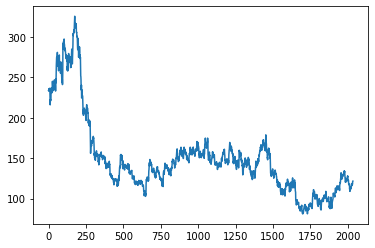

In [25]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
#LSTM are sensitive to the scale of the data

In [26]:
import numpy as np

In [27]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [33]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

### Train -test split is done using cross validation or random seed

In [34]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [36]:
training_size,test_size

(1322, 713)

In [37]:
#pre processing to check time steps
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [38]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [39]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [42]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [43]:
#3d
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [44]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

C:\Users\rashm\anaconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [45]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
20/20 [==============================] - 2s 123ms/step - loss: 0.0013 - val_loss: 9.8514e-04
Epoch 2/50
20/20 [==============================] - 3s 144ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 3/50
20/20 [==============================] - 3s 173ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 4/50
20/20 [==============================] - 3s 170ms/step - loss: 0.0012 - val_loss: 8.1640e-04
Epoch 5/50
20/20 [==============================] - 3s 167ms/step - loss: 0.0011 - val_loss: 9.6746e-04
Epoch 6/50
20/20 [==============================] - 3s 156ms/step - loss: 0.0011 - val_loss: 7.0874e-04
Epoch 7/50
20/20 [==============================] - 3s 147ms/step - loss: 9.7691e-04 - val_loss: 8.6576e-04
Epoch 8/50
20/20 [==============================] - 3s 155ms/step - loss: 9.4737e-04 - val_loss: 0.0010
Epoch 9/50
20/20 [==============================] - 3s 151ms/step - loss: 0.0011 - val_loss: 6.4390e-04
Epoch 10/50
20/20 [==============================] - 3s 144ms/step -

In [51]:

tf.__version__

'2.9.1'

In [52]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [53]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [54]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.020649138939681896

In [55]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.020657834956063437

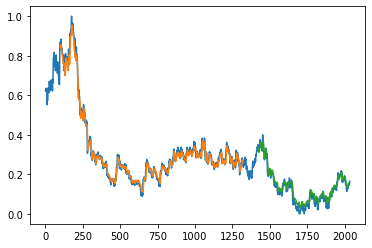

In [56]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [57]:
len(test_data)

713

In [61]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [62]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [63]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16188246]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

 0.1677295  0.16854177 0.16928244 0.16999125]
8 day output [[0.17068942]]
9 day input [0.12867647 0.11846405 0.14644608 0.14808007 0.15910948 0.15992647
 0.15788399 0.16441993 0.17892157 0.17933007 0.19260621 0.20812908
 0.18974673 0.18055556 0.18239379 0.17708333 0.17810458 0.18055556
 0.17810458 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595
 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549
 0.2128268  0.21568627 0.20445261 0.21772876 0.21098856 0.21425654
 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542
 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039
 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353
 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219
 0.17177288 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307
 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768
 0.12377451 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046
 0.12724673 0.13521242 0.14522059 0.15257353 0

16 day output [[0.17653674]]
17 day input [0.17892157 0.17933007 0.19260621 0.20812908 0.18974673 0.18055556
 0.18239379 0.17708333 0.17810458 0.18055556 0.17810458 0.17851307
 0.19607843 0.18913399 0.18954248 0.19403595 0.19444444 0.20200163
 0.19771242 0.19934641 0.19873366 0.1997549  0.2128268  0.21568627
 0.20445261 0.21772876 0.21098856 0.21425654 0.19750817 0.18811275
 0.17851307 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386
 0.18035131 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314
 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399
 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046
 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758
 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092
 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242
 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928
 0.15400327 0.14971405 0.1621732  0.16319444 0.16584967 0.16188246
 0.16397199 0.165569

25 day output [[0.18296103]]
26 day input [0.18055556 0.17810458 0.17851307 0.19607843 0.18913399 0.18954248
 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366
 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876 0.21098856
 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497
 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595
 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935
 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065
 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268  0.15196078
 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059
 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967 0.12806373
 0.13031046 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856
 0.14338235 0.14562908 0.15236928 0.15400327 0.14971405 0.1621732
 0.16319444 0.16584967 0.16188246 0.16397199 0.16556939 0.16677539
 0.1677295  0.16854177 0.16928244 0.16999125 0.17068942 0.17138813
 0.17209366 0.1728092

In [64]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [65]:
import matplotlib.pyplot as plt

In [68]:
len(df1)-100

1935

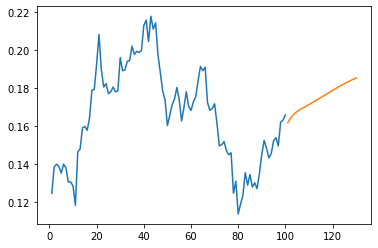

In [69]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

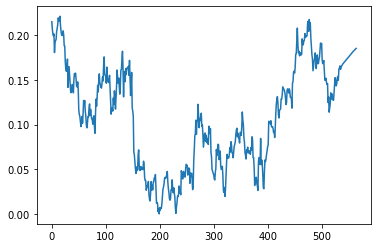

In [71]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1500:])

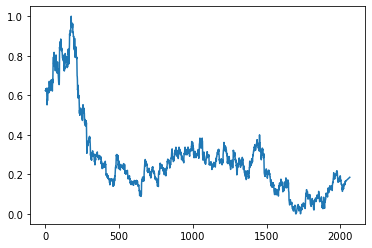

In [73]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

## This way we can predict the given stock prices